<a href="https://colab.research.google.com/github/saiparameshwarrao/NLP/blob/main/Assignment-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Load data from keras.datasets and perform following computational analysis:-


###(a) Preprocessing of the Data

###(b) Divide data into training and testing data set

###(c) Build the Gated Recurrent Units (GRU) Model

###(d) Training the GRU Model

###(e) Text Generation Using the Trained Model

###(f)  Evaluate Model’s accuracy

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb

vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GRU(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=1, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 128s 801ms/step - accuracy: 0.6242 - loss: 0.6372 - val_accuracy: 0.8480 - val_loss: 0.3588
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8438 - loss: 0.3601
Test Loss: 0.3585067689418793
Test Accuracy: 0.8433600068092346


##2.Compare accuracy of Long sort term memory and Gated recurrent Unit models for text generation using data from tensorflow.keras.datasets.

Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 67s 401ms/step - accuracy: 0.6799 - loss: 0.5676 - val_accuracy: 0.8478 - val_loss: 0.3469
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 398ms/step - accuracy: 0.8965 - loss: 0.2640 - val_accuracy: 0.8394 - val_loss: 0.3841
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.8402 - loss: 0.3870
LSTM Model Accuracy: 0.8402
Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 65s 398ms/step - accuracy: 0.6492 - loss: 0.5906 - val_accuracy: 0.8236 - val_loss: 0.3852
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 88s 435ms/step - accuracy: 0.8853 - loss: 0.2858 - val_accuracy: 0.7830 - val_loss: 0.4591
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.7872 - loss: 0.4563
GRU Model Accuracy: 0.7916


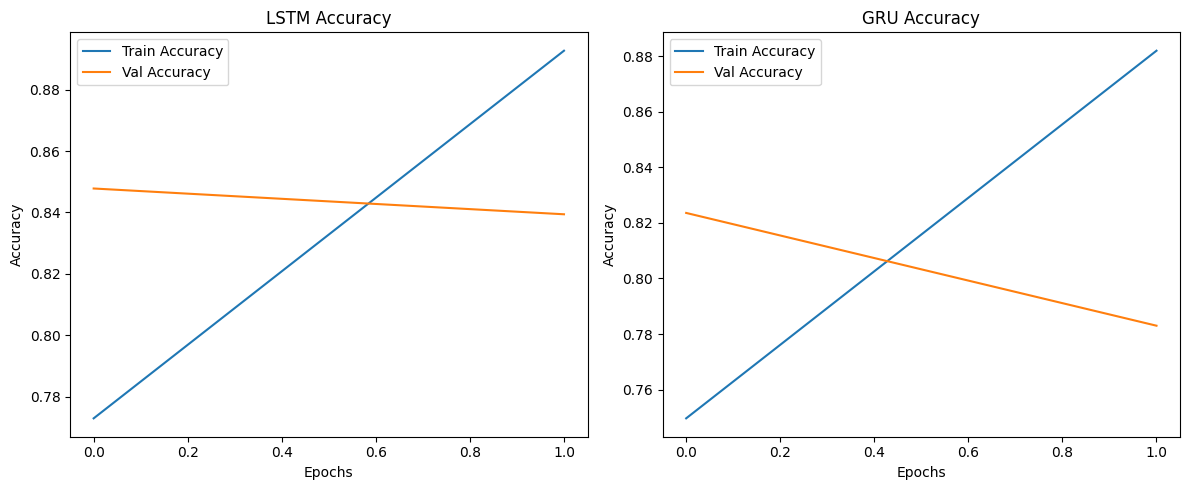

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

max_words = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(GRU(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')

gru_model = create_gru_model()
gru_history = gru_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')

